# Training Models to classify images into categories and subcategories

Importing required libraries 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature
from sklearn.linear_model import SGDClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
#from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import cv2 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix



Loading CIFAR-100 dataset. The images need to be transposed since their original shape isn't suitable for training

In [3]:
trnImages = np.load('trnImage.npy')
trnLabelF = np.load('trnLabel_fine.npy')
trnLabelC = np.load('trnlabel_coarse.npy')
tstImage = np.load('tstImage.npy')
tstLabelF = np.load('tstLabel_fine.npy')
tstLabelC = np.load('tstLabel_coarse.npy')


subcategory = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'] 

category = ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']


trnImages = np.transpose(trnImages, [3, 0, 1, 2])
tstImage = np.transpose(tstImage, [3, 0, 1, 2])
trnImages = trnImages


Image is 4D

- 1 is samples
- 2 is Height
- 3 is Width
- 4 is RGB


In [4]:
def plotResults(labels, prediction, category):
    plt.figure(figsize=(15,15))

    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(tstImage[i])
        plt.xlabel(category[(prediction[i])] + '\n' + category[labels[i]])

    plt.show()


def plotGraphs(model):
    plt.figure(figsize=[10,5])
    plt.subplot(121)
    plt.plot(model.history['accuracy'])
    plt.plot(model.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Training Accuracy',
            'Validation Accuracy'])
    plt.title('Accuracy Curves')

    plt.subplot(122)
    plt.plot(model.history['loss'])
    plt.plot(model.history['val_loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training Loss',
            'Validation Loss'])
    plt.title('Loss Curves')
    plt.show()

def argMax(data):
    example = []
    for x in range(len(data)):
        example.append(np.argmax(data[x]))
    return example

def hist(img):
  img_to_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
  img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])
  hist_equalization_result = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2BGR)
  return hist_equalization_result




Example of loading some images

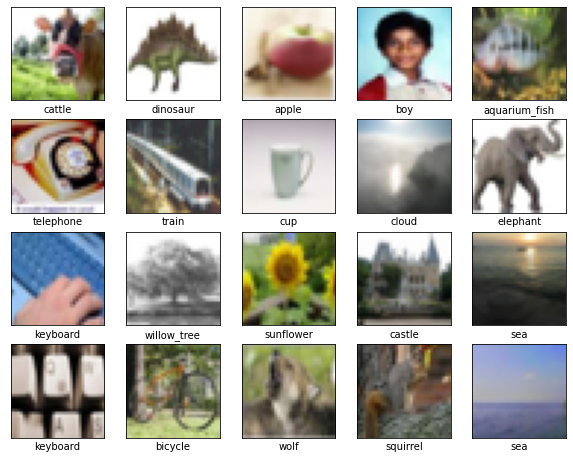

In [5]:

plt.figure(figsize=(10,10))

for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    #plt.grid(False)
    plt.imshow(trnImages[i])
    plt.xlabel(subcategory[trnLabelF[i]])

plt.show()


# Convolutional Neural Networks

modelF = A model used for predictiing fine labels for images

modelC = A model used for predictiing coarse labels for images

In [6]:
modelF = keras.models.Sequential()

modelF.add(Conv2D(32, (3, 3), activation='relu', padding = 'same', input_shape=(32, 32, 3)))
modelF.add(MaxPooling2D((2, 2)))
modelF.add(Dropout(0.2))
modelF.add(Conv2D(64, (3, 3), activation='relu', padding = 'same'))
modelF.add(MaxPooling2D((2, 2)))
modelF.add(Dropout(0.3))
modelF.add(Conv2D(128, (3, 3), activation='relu', padding = 'same'))
modelF.add(MaxPooling2D((2, 2)))
modelF.add(Dropout(0.35))


modelF.add(Flatten())
modelF.add(Dense(1024, activation='relu',))
modelF.add(Dropout(0.5))
modelF.add(Dense(100, activation= 'softmax'))

modelF.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelF.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         7

2021-12-08 21:42:22.806887: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
historyF = modelF.fit(trnImages, trnLabelF, epochs=35, batch_size = 128, validation_split=0.2, verbose = 1)
#historyC = modelF.fit(trnImages, trnLabelC, epochs=30, batch_size = 128, validation_split=0.2, verbose = 1)

2021-12-08 21:42:23.594526: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/35
313/313 [==============================] - 35s 110ms/step - loss: 4.1917 - accuracy: 0.0588 - val_loss: 3.7597 - val_accuracy: 0.1303
Epoch 2/35
313/313 [==============================] - 36s 114ms/step - loss: 3.5431 - accuracy: 0.1581 - val_loss: 3.2246 - val_accuracy: 0.2328
Epoch 3/35
313/313 [==============================] - 38s 122ms/step - loss: 3.2158 - accuracy: 0.2160 - val_loss: 2.9963 - val_accuracy: 0.2765
Epoch 4/35
313/313 [==============================] - 40s 128ms/step - loss: 2.9891 - accuracy: 0.2593 - val_loss: 2.8015 - val_accuracy: 0.3066
Epoch 5/35
313/313 [==============================] - 40s 129ms/step - loss: 2.8295 - accuracy: 0.2895 - val_loss: 2.7014 - val_accuracy: 0.3295
Epoch 6/35
313/313 [==============================] - 41s 130ms/step - loss: 2.7168 - accuracy: 0.3151 - val_loss: 2.5685 - val_accuracy: 0.3499
Epoch 7/35
313/313 [==============================] - 42s 133ms/step - loss: 2.5950 - accuracy: 0.3365 - val_loss: 2.4999 - val_ac

Accuracy of modelF is around 43%

In [8]:
resultsF = modelF.evaluate(tstImage, tstLabelF)

print(f'Test set loss: {resultsF[0]:0.2f}, test set accuracy: {resultsF[1]*100:0.2f}%')

313/313 [==============================] - 4s 12ms/step - loss: 2.0725 - accuracy: 0.4710
Test set loss: 2.07, test set accuracy: 47.10%


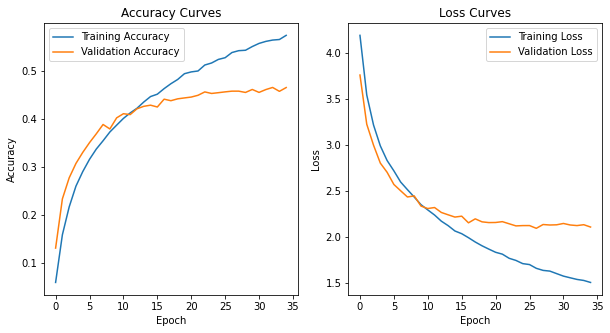

In [9]:
plotGraphs(historyF)
#plotGraphs(historyC)

Predicting the labels for the test images

In [10]:
predictionFine = modelF.predict(tstImage)


In [11]:
predictionFine = argMax(predictionFine)

As we can see, the model predicts a few of the images correctly. The top label is the prediction and the bottom label is the actual label

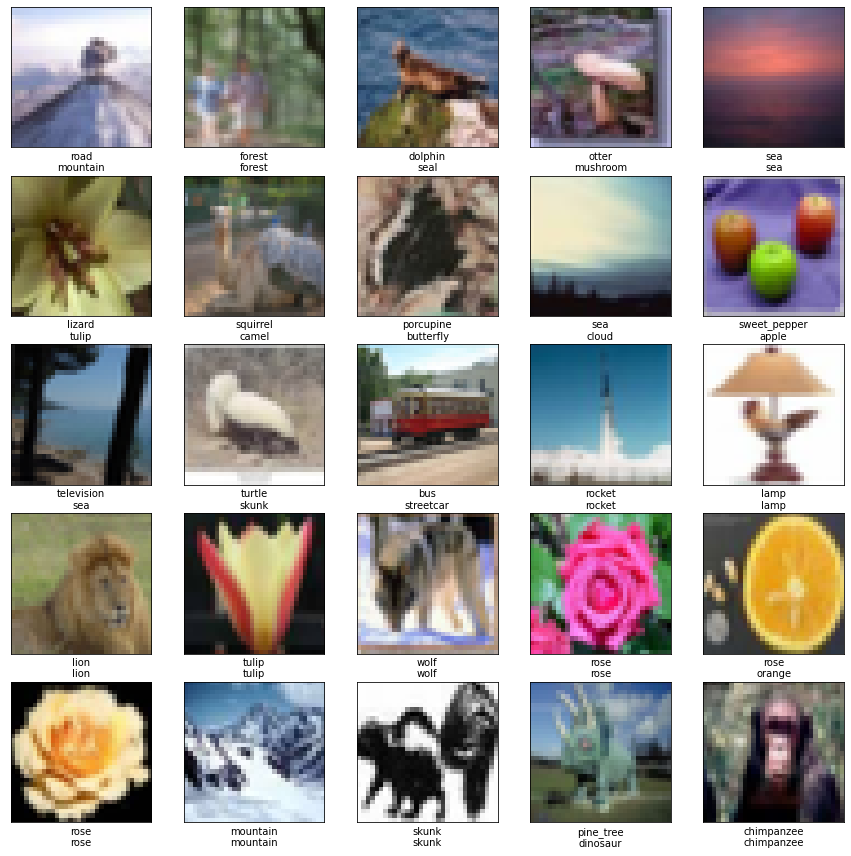

In [12]:
plotResults(tstLabelF, predictionFine, subcategory)

Coarse Labels Model

In [13]:
modelC = keras.models.Sequential()

modelC.add(Conv2D(32, (3, 3), activation='relu', padding = 'same', input_shape=(32, 32, 3)))
modelC.add(MaxPooling2D((2, 2)))
modelC.add(Dropout(0.1))
modelC.add(Conv2D(64, (3, 3), activation='relu', padding = 'same'))
#model.add(Conv2D(64, (3, 3), activation='relu', padding = 'same'))
modelC.add(MaxPooling2D((2, 2)))
modelC.add(Dropout(0.2))
modelC.add(Conv2D(128, (3, 3), activation='relu', padding = 'same'))
modelC.add(MaxPooling2D((2, 2)))
modelC.add(Dropout(0.35))


modelC.add(Flatten())
modelC.add(Dense(128, activation='relu',))
modelC.add(Dropout(0.5))
modelC.add(Dense(20, activation= 'softmax'))


modelC.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelC.summary()

resultC = modelC.predict(trnImages)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)        

In [14]:
historyC = modelC.fit(trnImages, trnLabelC, epochs=35, batch_size = 128, validation_split=0.2, verbose = 1)

Epoch 1/35
313/313 [==============================] - 31s 99ms/step - loss: 2.7050 - accuracy: 0.1594 - val_loss: 2.4294 - val_accuracy: 0.2649
Epoch 2/35
313/313 [==============================] - 32s 102ms/step - loss: 2.3851 - accuracy: 0.2630 - val_loss: 2.1702 - val_accuracy: 0.3391
Epoch 3/35
313/313 [==============================] - 32s 102ms/step - loss: 2.2330 - accuracy: 0.3074 - val_loss: 2.0215 - val_accuracy: 0.3774
Epoch 4/35
313/313 [==============================] - 32s 102ms/step - loss: 2.1299 - accuracy: 0.3404 - val_loss: 1.9146 - val_accuracy: 0.4134
Epoch 5/35
313/313 [==============================] - 32s 103ms/step - loss: 2.0484 - accuracy: 0.3632 - val_loss: 1.8579 - val_accuracy: 0.4308
Epoch 6/35
313/313 [==============================] - 32s 104ms/step - loss: 1.9737 - accuracy: 0.3885 - val_loss: 1.8043 - val_accuracy: 0.4488
Epoch 7/35
313/313 [==============================] - 32s 103ms/step - loss: 1.9194 - accuracy: 0.4015 - val_loss: 1.7509 - val_acc

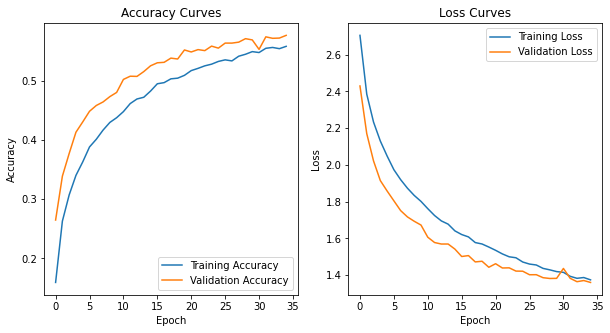

In [15]:
plotGraphs(historyC)

In [16]:
resultsC = modelC.evaluate(tstImage, tstLabelC)

print(f'Test set loss: {resultsC[0]:0.2f}, test set accuracy: {resultsC[1]*100:0.2f}%')

313/313 [==============================] - 3s 8ms/step - loss: 1.3632 - accuracy: 0.5728
Test set loss: 1.36, test set accuracy: 57.28%


In [17]:
predictionCoarse = modelC.predict(tstImage)

In [18]:
predictionCoarse = argMax(predictionCoarse)

As we can see, the model predicts a few of the images correctly. The top label is the prediction and the bottom label is the actual label

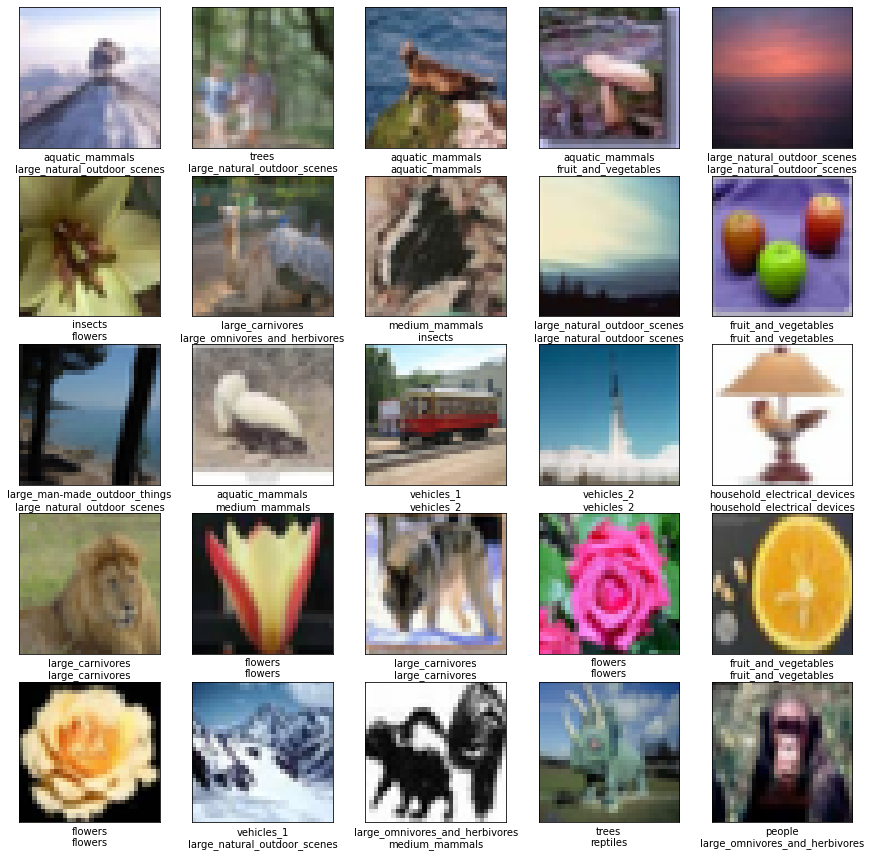

In [19]:
plotResults(tstLabelC, predictionCoarse, category)

# PCA, SVC and KNN

In [20]:
pca = PCA(n_components=4)

trnshape, tx, ty, tz = trnImages.shape
tstshape, tsx, tsy, tsz = tstImage.shape

trnData = trnImages.reshape(trnshape, tx*ty*tz)
tstData = tstImage.reshape(tstshape, tsx*tsy*tsz)


pca.fit(trnData)

#train = pca.transform(trnData)
#test = pca.transform(tstData)



PCA(n_components=4)

In [21]:
k = 0
total = sum(pca.explained_variance_)
current_sum = 0

while(current_sum / total < 0.98):
    current_sum += pca.explained_variance_[k]
    k += 1
k

4

In [22]:
pca = PCA(n_components=k, whiten=True, svd_solver='randomized')

x_train_pca = pca.fit_transform(trnData)
x_test_pca = pca.transform(tstData)

# SVM model for Coarse Labels

In [23]:
svcC = svm.SVC()
svcC.fit(x_train_pca, trnLabelC)

SVC()

In [24]:
y_pred_svmC = svcC.predict(x_test_pca)
svc_scoreC = accuracy_score(tstLabelC, y_pred_svmC)
svc_scoreC


0.2103

/Users/amekid/Documents/GitHub/bigDataLabs/lab4/tensorflow-metal/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


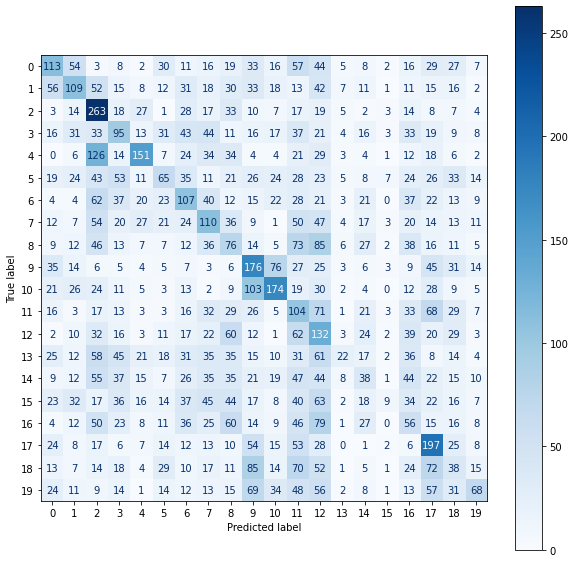

In [25]:
svcCM = confusion_matrix(y_pred_svmC, tstLabelC)
fig, ax = plt.subplots(figsize=(10, 10))

plot_confusion_matrix(svcC,x_test_pca, tstLabelC,cmap='Blues', ax=ax)

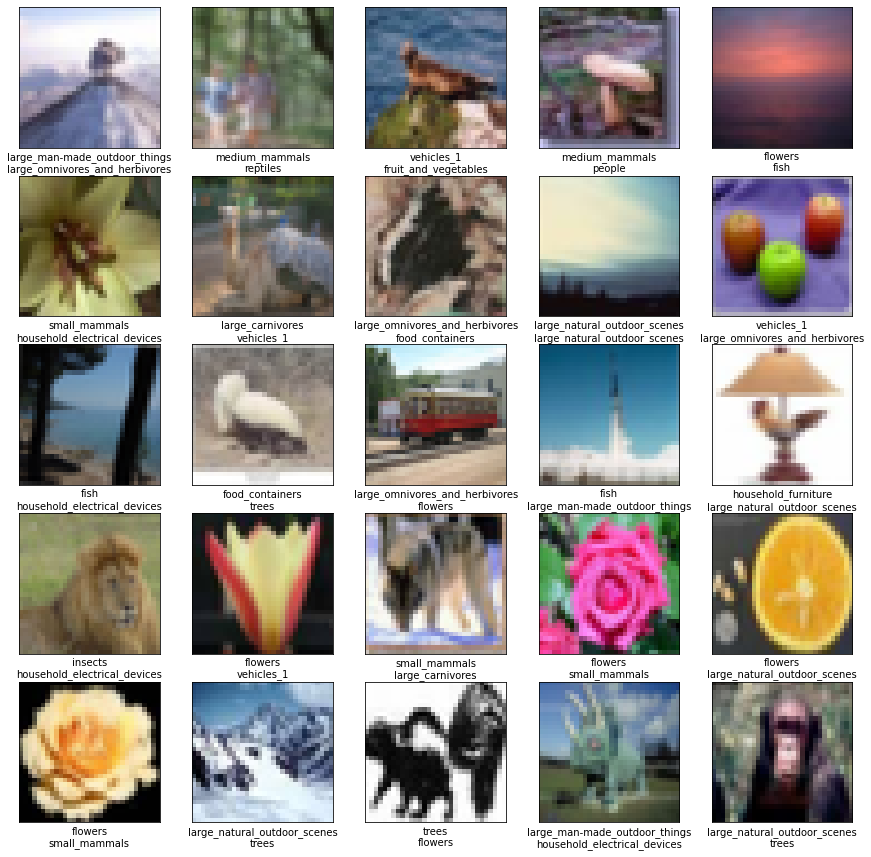

In [26]:
plotResults(trnLabelC, y_pred_svmC, category)

# SVC model for Fine Labels

In [27]:
svcF = svm.SVC()
svcF.fit(x_train_pca, trnLabelF)

SVC()

In [28]:
y_pred_svmF = svcF.predict(x_test_pca)
svc_scoreF = accuracy_score(tstLabelF, y_pred_svmF)
svc_scoreF

0.1135

/Users/amekid/Documents/GitHub/bigDataLabs/lab4/tensorflow-metal/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


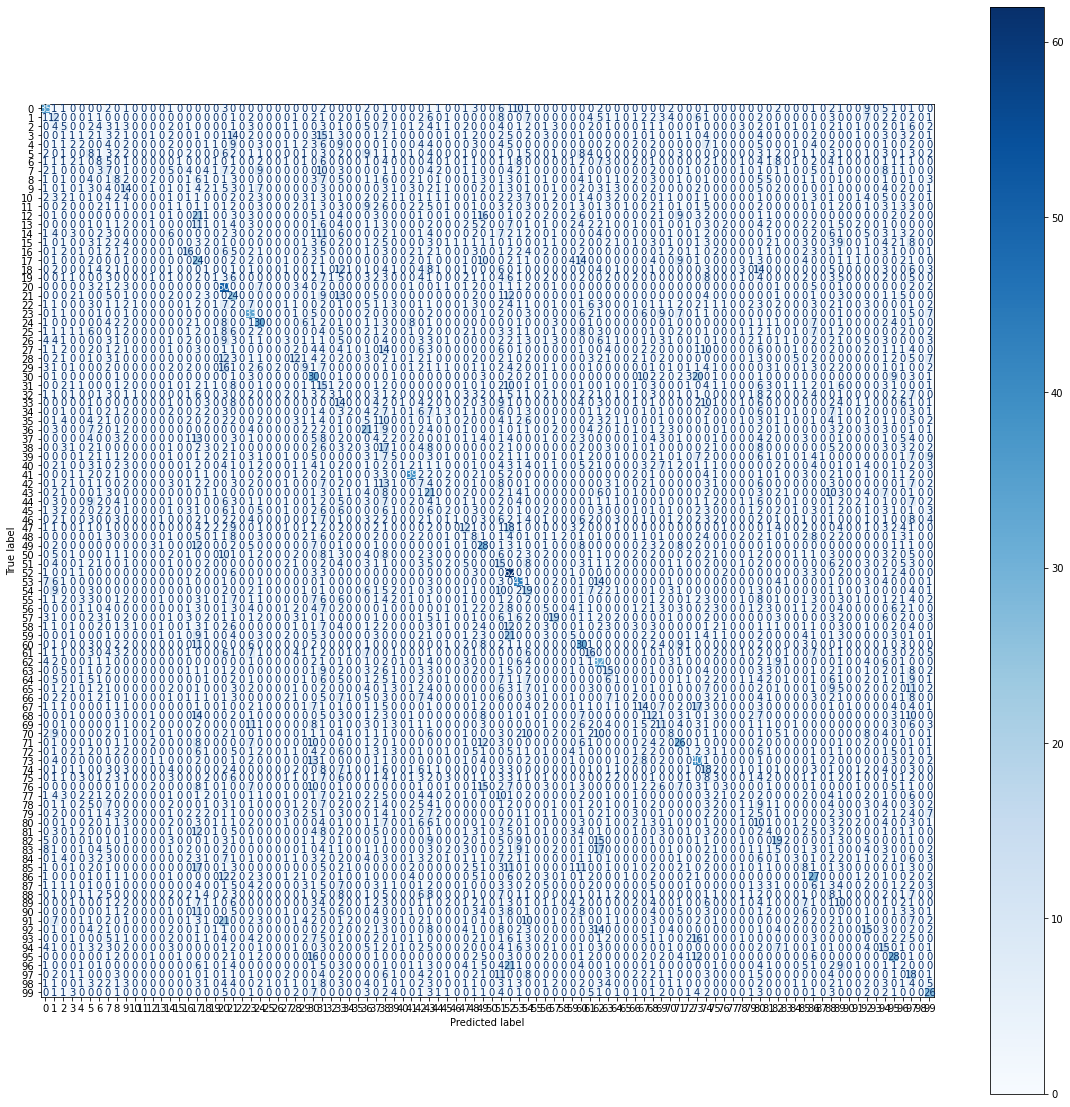

In [29]:
svcCF = confusion_matrix(y_pred_svmF, tstLabelF)
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(svcF,x_test_pca, tstLabelF,cmap='Blues', ax = ax)

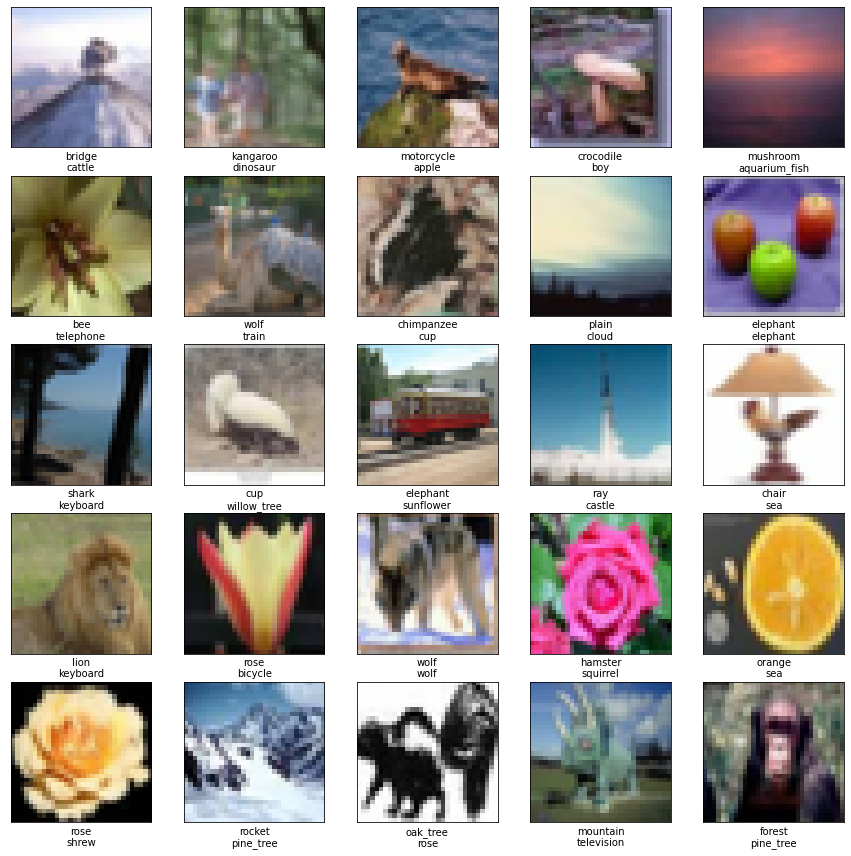

In [30]:
plotResults(trnLabelF, y_pred_svmF, subcategory)

# KNN for Coarse Labels

Finding the optimal K value for coarse labels

Minimum error:- 0.803 at K = 38


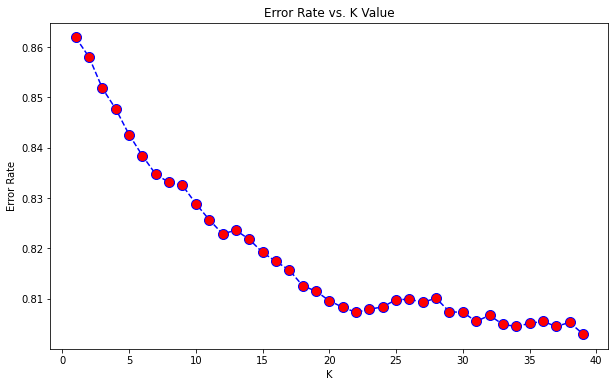

In [43]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train_pca,trnLabelC)
 pred_i = knn.predict(x_test_pca)
 error_rate.append(np.mean(pred_i != tstLabelC))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.197 at K = 38


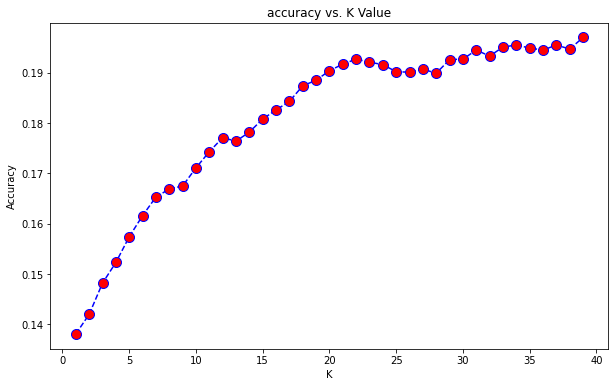

In [44]:

acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train_pca,trnLabelC)
    yhat = neigh.predict(x_test_pca)
    acc.append(metrics.accuracy_score(tstLabelC, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))
maxK = acc.index(max(acc))

In [47]:
maxK = acc.index(max(acc))

In [48]:
knnC = KNeighborsClassifier(n_neighbors=maxK)
knnC.fit(x_train_pca, trnLabelC)


KNeighborsClassifier(n_neighbors=38)

In [49]:
y_pred_knnC = knnC.predict(x_test_pca)

knn_score = accuracy_score(tstLabelC, y_pred_knnC)
knn_score

0.1947

/Users/amekid/Documents/GitHub/bigDataLabs/lab4/tensorflow-metal/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


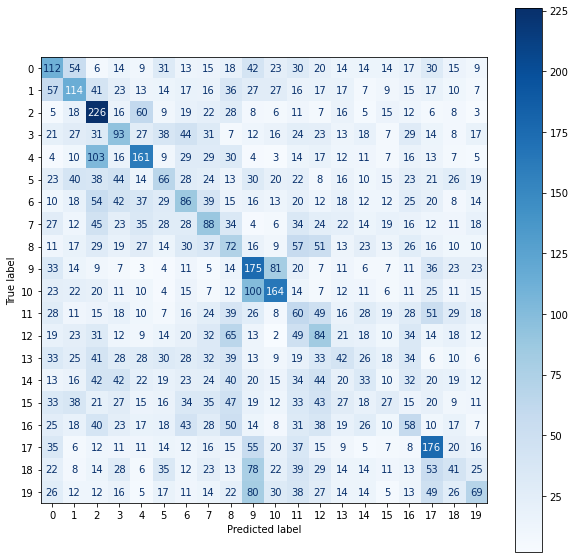

In [50]:
knnCM = confusion_matrix(y_pred_knnC, tstLabelC)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(knnC,x_test_pca, tstLabelC,cmap='Blues' ,ax = ax)

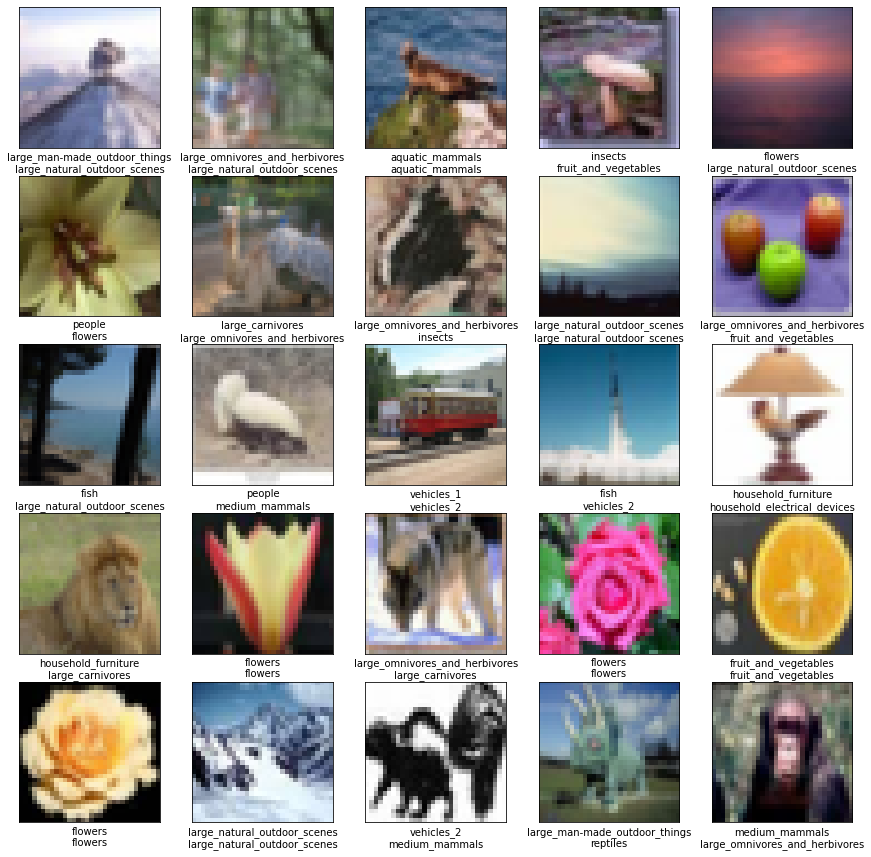

In [51]:
plotResults(tstLabelC, y_pred_knnC, category)

# KNN for Fine Labels

Finding the optimal K value for fine labels


Minimum error:- 0.905 at K = 37


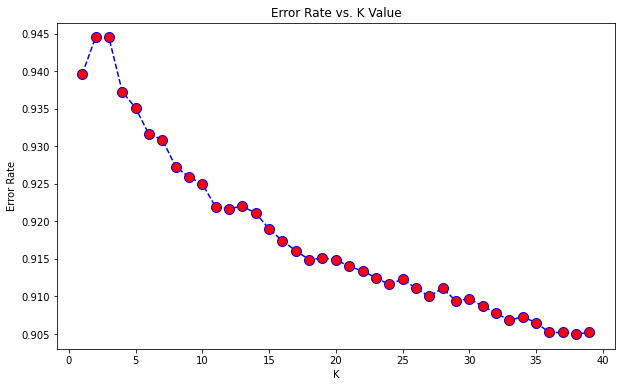

In [52]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train_pca,trnLabelF)
 pred_i = knn.predict(x_test_pca)
 error_rate.append(np.mean(pred_i != tstLabelF))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.095 at K = 37


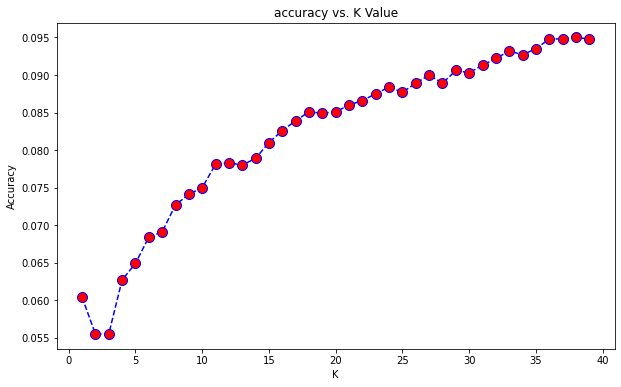

In [53]:
acc = []
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train_pca,trnLabelF)
    yhat = neigh.predict(x_test_pca)
    acc.append(metrics.accuracy_score(tstLabelF, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))
maxK = acc.index(max(acc))

In [54]:
knnF = KNeighborsClassifier(n_neighbors=maxK)
knnF.fit(x_train_pca, trnLabelF)

KNeighborsClassifier(n_neighbors=37)

In [55]:
y_pred_knnF = knnF.predict(x_test_pca)

knn_scoreF = accuracy_score(tstLabelF, y_pred_knnF)
knn_scoreF

0.0948

In [37]:
#tstLabelC = tstLabelC.reshape(-1,1)
#y_pred_knnC = y_pred_knnC.reshape(-1, 1)
#trnLabelC = trnLabelC.reshape(-1, 1)

/Users/amekid/Documents/GitHub/bigDataLabs/lab4/tensorflow-metal/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


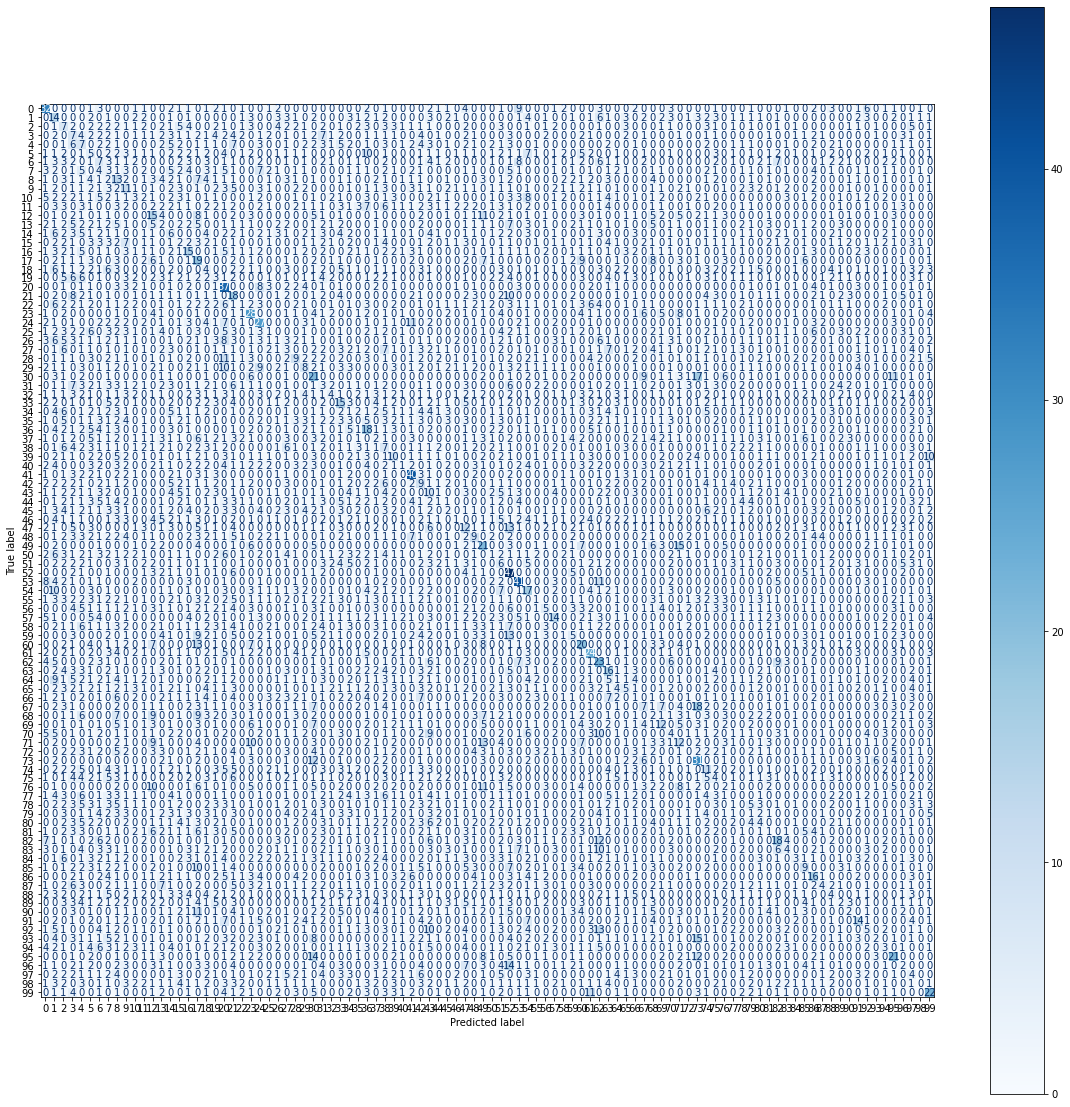

In [56]:
knnFM = confusion_matrix(y_pred_knnF, tstLabelF)
fig, ax = plt.subplots(figsize=(20, 20))

plot_confusion_matrix(knnF,x_test_pca, tstLabelF,cmap='Blues', ax = ax)

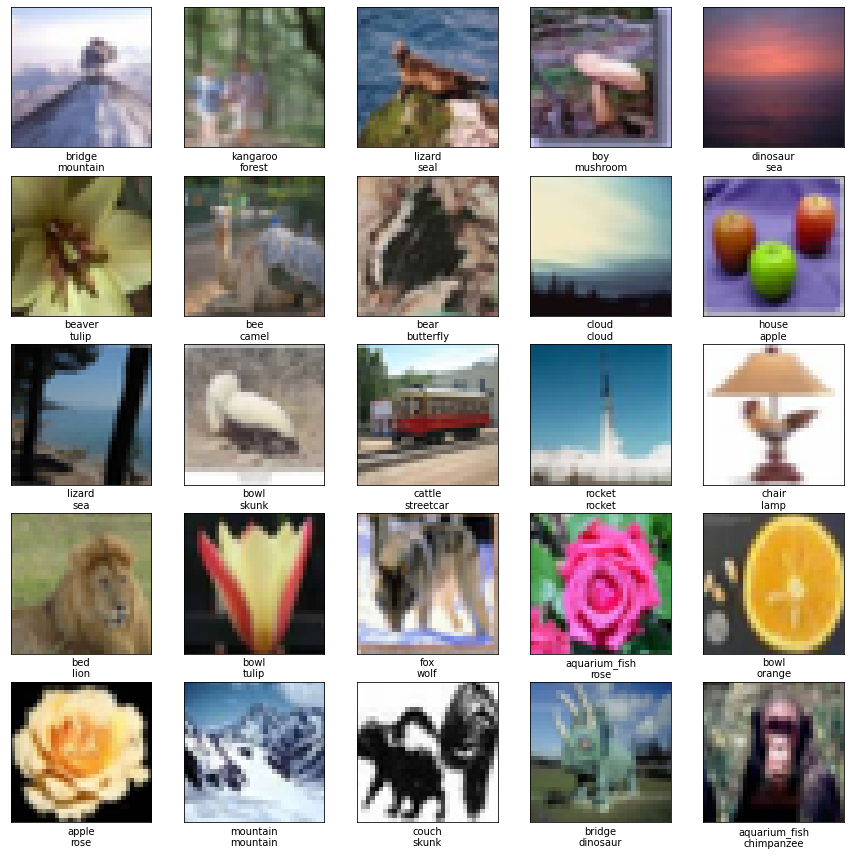

In [39]:
plotResults(tstLabelF, y_pred_knnF, subcategory)